In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import tensorflow.keras as keras
from tensorflow.keras.utils import normalize

import warnings
warnings.simplefilter("ignore")
%matplotlib inline

2021-09-01 11:41:44.367322: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-09-01 11:41:44.367381: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

**Значения меток класса**
- [0] - T-shirt/top
- [1] - Trouser
- [2] - Pullover
- [3] - Dress
- [4] - Coat
- [5] - Sandal
- [6] - Shirt
- [7] - Sneaker
- [8] - Bag
- [9] - Ankle boot

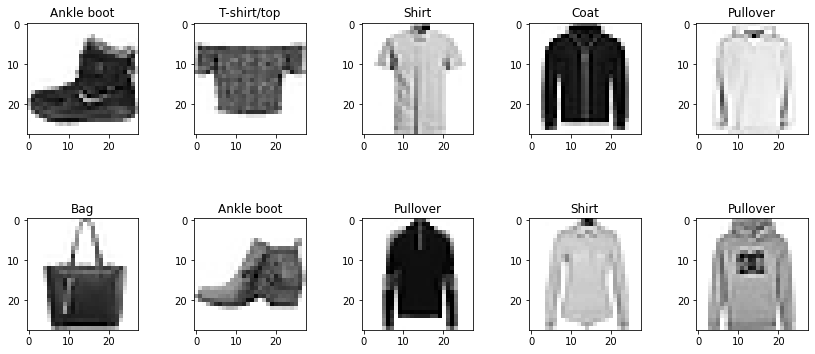

In [4]:
# sample visualization
fig, axs = plt.subplots(2,5, figsize=(14, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.5)

axs = axs.ravel()

for i in range(10):
    img_id = i * np.random.randint(1000)
    axs[i].imshow(train_images[img_id], cmap='gray_r')
    axs[i].set_title(class_names[train_labels[img_id]])

In [5]:
train_images = normalize(train_images)
test_images = normalize(test_images)

In [6]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

2021-09-01 11:41:47.545309: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-01 11:41:47.546885: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-09-01 11:41:47.546949: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2021-09-01 11:41:47.547007: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2021-09-01 11:41:47.547065: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co